### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.



The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.



Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:


X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

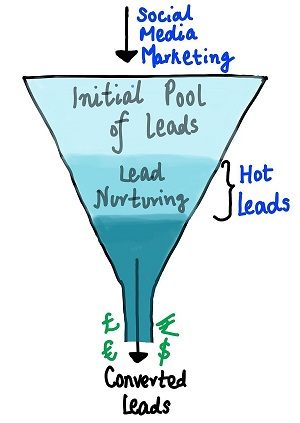


### Goals

There are quite a few goals for this case study:

1.   Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2.   There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.




### Data Dictionary

# Variables and Descriptions

| Variables                             | Description                                                                                                                                       |
|---------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **Prospect ID**                       | A unique ID with which the customer is identified.                                                                                               |
| **Lead Number**                       | A lead number assigned to each lead procured.                                                                                                   |
| **Lead Origin**                       | The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.                          |
| **Lead Source**                       | The source of the lead. Includes Google, Organic Search, Olark Chat, etc.                                                                       |
| **Do Not Email**                      | An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.               |
| **Do Not Call**                       | An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.                |
| **Converted**                         | The target variable. Indicates whether a lead has been successfully converted or not.                                                           |
| **TotalVisits**                       | The total number of visits made by the customer on the website.                                                                                  |
| **Total Time Spent on Website**       | The total time spent by the customer on the website.                                                                                            |
| **Page Views Per Visit**              | Average number of pages on the website viewed during the visits.                                                                                |
| **Last Activity**                     | Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.                                                   |
| **Country**                           | The country of the customer.                                                                                                                    |
| **Specialization**                    | The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form. |
| **How did you hear about X Education**| The source from which the customer heard about X Education.                                                                                     |
| **What is your current occupation**   | Indicates whether the customer is a student, unemployed, or employed.                                                                           |
| **What matters most to you in choosing this course** | An option selected by the customer indicating what is their main motto behind doing this course.                                                |
| **Search**                            | Indicating whether the customer had seen the ad in any of the listed items.                                                                     |
| **Magazine**                          | Indicating whether the customer had seen the ad in any of the listed items.                                                                                                                                                  |
| **Newspaper Article**                 |    Indicating whether the customer had seen the ad in any of the listed items.                                                                                                                                               |
| **X Education Forums**                |       Indicating whether the customer had seen the ad in any of the listed items.                                                                                                                                            |
| **Newspaper**                         |  Indicating whether the customer had seen the ad in any of the listed items.                                                                                                                                                 |
| **Digital Advertisement**            |        Indicating whether the customer had seen the ad in any of the listed items.                                                                                                                                           |
| **Through Recommendations**          | Indicates whether the customer came in through recommendations.                                                                                 |
| **Receive More Updates About Our Courses** | Indicates whether the customer chose to receive more updates about the courses.                                                                  |
| **Tags**                              | Tags assigned to customers indicating the current status of the lead.                                                                           |
| **Lead Quality**                      | Indicates the quality of lead based on the data and intuition of the employee who has been assigned to the lead.                                 |
| **Update me on Supply Chain Content** | Indicates whether the customer wants updates on the Supply Chain Content.                                                                        |
| **Get updates on DM Content**         | Indicates whether the customer wants updates on the DM Content.                                                                                 |
| **Lead Profile**                      | A lead level assigned to each customer based on their profile.                                                                                  |
| **City**                              | The city of the customer.                                                                                                                       |
| **Asymmetrique Activity Index**       | An index and score assigned to each customer based on their activity and their profile.                                                         |
| **Asymmetrique Profile Index**        |       An index and score assigned to each customer based on their activity and their profile.                                                                                                                                            |
| **Asymmetrique Activity Score**       |      An index and score assigned to each customer based on their activity and their profile.                                                                                                                                             |
| **Asymmetrique Profile Score**        |  An index and score assigned to each customer based on their activity and their profile.                                                                                                                                                 |
| **I agree to pay the amount through cheque** | Indicates whether the customer has agreed to pay the amount through cheque or not.                                                               |
| **a free copy of Mastering The Interview** | Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.                                                            |
| **Last Notable Activity**             | The last notable activity performed by the student.                                                                                             |


#### Data Import

In [7]:
#Importing all the required libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler


In [8]:
#Importing the dataset
df = pd.read_csv('Leads.csv')

In [9]:
#Checking the head of the dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
#Gettting the description of all the numeric variables
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [11]:
#Checking the shape of the dataset
df.shape

(9240, 37)

In [12]:
# Getting the datatset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [13]:
#Checking the columns name from the dataset
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### EDA

In [15]:
#Dropping all the duplicates using Prospect Id as unique key
df = df.drop_duplicates(subset=['Prospect ID']) #remove duplicates

In [16]:
# We have a lot of columns with Select as a count. We will impute that as Null Values
df = df.replace('Select', np.nan)

In [17]:
#Checking the sum of all the null values present
null_df = df.isnull().sum()
null_df

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [18]:
#Checking the overall percent of missing data
nullpercent_df = df.apply(lambda x: round(100 * x.isnull().sum() / len(df), 2))
nullpercent_df

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [19]:
#Remove the empty row greater than 40% of null values.

remove = list(nullpercent_df[nullpercent_df.values>=40].index)
df.drop(labels=remove,axis=1,inplace=True)
print(len(remove))

7


In [20]:
# We will now check summary of the unique values and their counts for each categorical column.
for column in df.select_dtypes(include='object').columns:
    print(df[column].value_counts())
    print("###########################################")

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
###########################################
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
###########################################
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebo

We have a lot of columns which doen't make any sense to keep for our analysis. Therefore we will drop them

In [22]:
remove_col = ['Prospect ID', 'Lead Number','Newspaper Article','Digital Advertisement','Newspaper','X Education Forums','Magazine','Search','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses', 'Through Recommendations','What matters most to you in choosing a course']
df.drop(labels=remove_col,axis=1,inplace=True)
print(len(remove))

7


In [23]:
df.shape #Checking the shape again

(9240, 17)

In [24]:
#Checking again the missing values
df.apply(lambda x: round(100 * x.isnull().sum() / len(df), 2)).sort_values(ascending = False)

City                                        39.71
Specialization                              36.58
Tags                                        36.29
What is your current occupation             29.11
Country                                     26.63
TotalVisits                                  1.48
Page Views Per Visit                         1.48
Last Activity                                1.11
Lead Source                                  0.39
A free copy of Mastering The Interview       0.00
I agree to pay the amount through cheque     0.00
Lead Origin                                  0.00
Total Time Spent on Website                  0.00
Converted                                    0.00
Do Not Call                                  0.00
Do Not Email                                 0.00
Last Notable Activity                        0.00
dtype: float64

In [25]:
df["City"].value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

Looking at the City distribution we can say that we have Mumbai, Maharashtra and other cities. We will categorize them into 3 rather than multiple codes

In [27]:
df.loc[df['City'].isin(['Thane & Outskirts', 'Other Cities of Maharashtra']), 'City'] = 'Non-Mumbai Maharashtra Cities'
df.loc[df['City'].isin(['Other Cities', 'Other Metro Cities', 'Tier II Cities']), 'City'] = 'Non-Maharashtra Cities'

In [28]:
df["City"].value_counts(normalize = True)

City
Mumbai                           0.578352
Non-Mumbai Maharashtra Cities    0.217017
Non-Maharashtra Cities           0.204631
Name: proportion, dtype: float64

In [29]:
df['City'] = df['City'].fillna(
    pd.Series(
        np.random.choice(
            ['Mumbai', 'Non-Mumbai Maharashtra Cities', 'Non-Maharashtra Cities'],
            p=[0.5784, 0.2170, 0.2046],
            size=len(df)
        )
    )
)

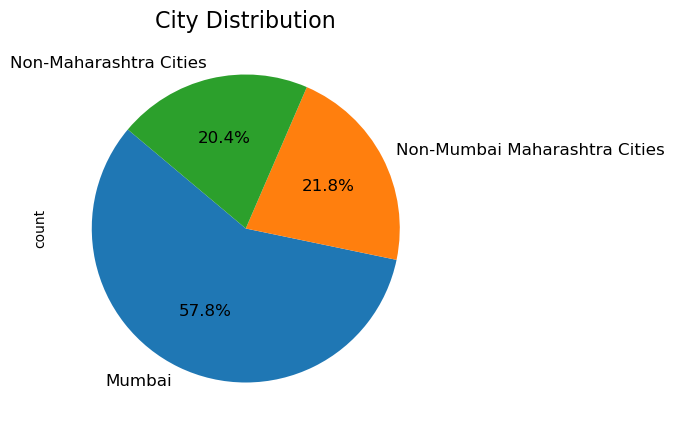

In [30]:
# Create the pie chart directly from df['City']
plt.figure(figsize=(5, 5))
df['City'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title('City Distribution', fontsize=16)
plt.show()

In [31]:
df["Specialization"].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [32]:
# Group 'General Management' specializations
df.loc[df['Specialization'].isin(['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 'Business Administration', 'IT Projects Management']), 'Specialization'] = 'General Management'

# Group 'Supply Chain & E-Commerce' specializations
df.loc[df['Specialization'].isin(['Supply Chain Management', 'Retail Management', 'E-COMMERCE', 'E-Business']), 'Specialization'] = 'Supply Chain & E-Commerce'

# Group 'Banking & Finance' specialization
df.loc[df['Specialization'] == 'Banking, Investment And Insurance', 'Specialization'] = 'Banking & Finance'

# Group 'Tourism & Hospitality' specializations
df.loc[df['Specialization'].isin(['Travel and Tourism', 'Hospitality Management']), 'Specialization'] = 'Tourism & Hospitality'

# Group 'Media & Advertising' specialization
df.loc[df['Specialization'] == 'Media and Advertising', 'Specialization'] = 'Media & Advertising'

# Group 'Healthcare' specialization
df.loc[df['Specialization'] == 'Healthcare Management', 'Specialization'] = 'Healthcare'

# Group 'Specialized Fields' specializations
df.loc[df['Specialization'].isin(['International Business', 'Rural and Agribusiness', 'Services Excellence']), 'Specialization'] = 'Specialized Fields'


In [33]:
df["Specialization"].value_counts(normalize = True)

Specialization
General Management           0.671331
Supply Chain & E-Commerce    0.105461
Banking & Finance            0.057679
Tourism & Hospitality        0.054096
Specialized Fields           0.049659
Media & Advertising          0.034642
Healthcare                   0.027133
Name: proportion, dtype: float64

In [34]:
# Fill missing values in 'Specialization'
df['Specialization'] = df['Specialization'].fillna(
    pd.Series(
        np.random.choice(
            ['General Management', 'Supply Chain & E-Commerce', 'Banking & Finance',
             'Tourism & Hospitality', 'Specialized Fields', 'Media & Advertising', 'Healthcare'],
            p=[0.67, 0.11, 0.06, 0.05, 0.05, 0.03, 0.03],
            size=len(df)
        )
    )
)


In [35]:
df["Specialization"].value_counts(normalize = True)

Specialization
General Management           0.670455
Supply Chain & E-Commerce    0.108225
Banking & Finance            0.059307
Tourism & Hospitality        0.050649
Specialized Fields           0.050325
Media & Advertising          0.033983
Healthcare                   0.027056
Name: proportion, dtype: float64

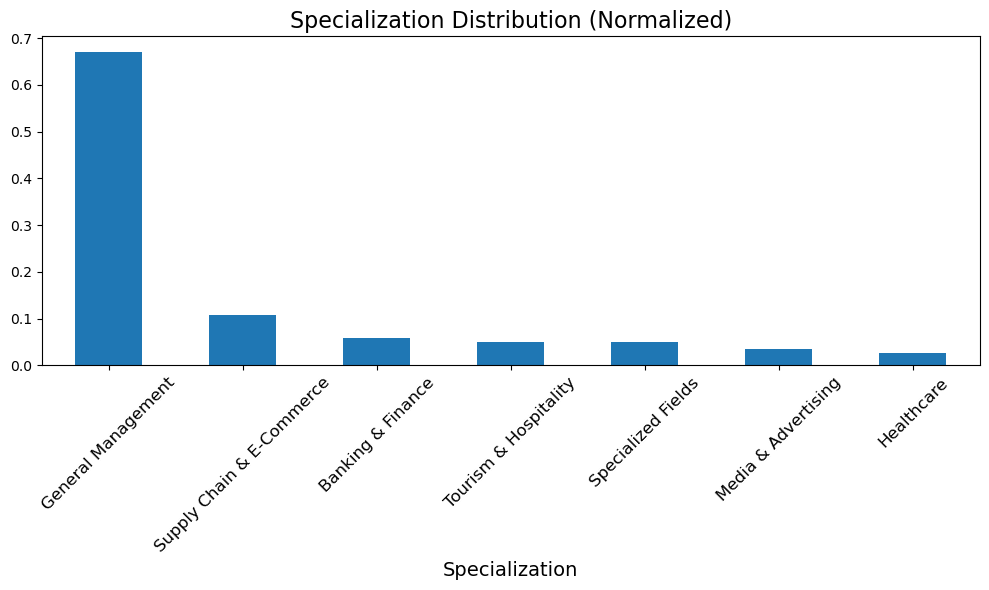

In [36]:
# Create a bar chart 

plt.figure(figsize=(10, 6))
df["Specialization"].value_counts(normalize=True).plot.bar()

# Customize the chart
plt.title('Specialization Distribution (Normalized)', fontsize=16)
plt.xlabel('Specialization', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

In [37]:
df["Tags"].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

Tags column doesn't seem to be useful for our analysis. We will drop that

In [39]:
df.drop(['Tags'], axis = 1, inplace = True)

In [40]:
df.rename(columns={"What is your current occupation": "occupation"}, inplace=True) #Renaming the column
df["occupation"].value_counts()

occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [41]:
df.loc[df['occupation'].isin(['Student', 'Other', 'Housewife','Businessman']), 'occupation'] = 'Student and Other'
df["occupation"].value_counts(normalize = True)

occupation
Unemployed              0.854962
Working Professional    0.107786
Student and Other       0.037252
Name: proportion, dtype: float64

In [42]:
df['occupation'] = df['occupation'].fillna(
    pd.Series(
        np.random.choice(
            ['Unemployed', 'Working Professional', 'Student and Other'],
            p=[0.85, 0.11, 0.04],
            size=len(df)
        )
    )
)

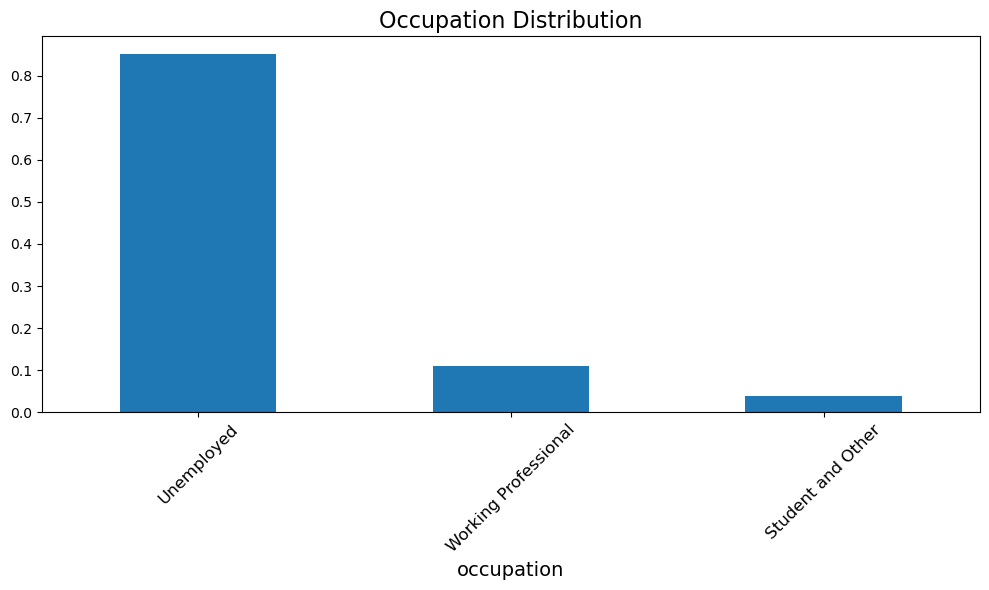

In [43]:
# Create a bar chart 

plt.figure(figsize=(10, 6))
df["occupation"].value_counts(normalize=True).plot.bar()

# Customize the chart
plt.title('Occupation Distribution', fontsize=16)
plt.xlabel('occupation', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

In [44]:
df['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

The data seems to be highly skewed. We will drop it

In [46]:
df.drop('Country', axis = 1, inplace = True)

In [47]:
df.rename(columns={"Last Activity": "LastActivity"}, inplace=True)
df.rename(columns={"Lead Source": "LeadSource"}, inplace=True)
df.rename(columns={"Page Views Per Visit": "PageViewsPerVisit"}, inplace=True)


In [48]:
var  = ['TotalVisits', 'LastActivity', 'LeadSource', 'PageViewsPerVisit']
for x in var:
  print(x)
  print(df[x].value_counts())
  print('######################################')

TotalVisits
TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64
######################################
LastActivity
LastActivity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable    

In [49]:
# Drop the null value rows in the column 'TotalVisits'
df = df[~pd.isnull(df['TotalVisits'])]

We will the log for the data. as we have skewed distribution

In [51]:
df['Log_TotalVisits'] = np.log1p(df['TotalVisits'])

In [52]:
# Drop the null value rows in the column 'TotalVisits'
df = df[~pd.isnull(df['LeadSource'])]

In [53]:
df.shape

(9074, 16)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   LeadSource                                9074 non-null   object 
 2   Do Not Email                              9074 non-null   object 
 3   Do Not Call                               9074 non-null   object 
 4   Converted                                 9074 non-null   int64  
 5   TotalVisits                               9074 non-null   float64
 6   Total Time Spent on Website               9074 non-null   int64  
 7   PageViewsPerVisit                         9074 non-null   float64
 8   LastActivity                              9074 non-null   object 
 9   Specialization                            9074 non-null   object 
 10  occupation                               

In [55]:
#Checking again the missing values
df.apply(lambda x: round(100 * x.isnull().sum() / len(df), 2)).sort_values(ascending = False)

Lead Origin                                 0.0
LeadSource                                  0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
PageViewsPerVisit                           0.0
LastActivity                                0.0
Specialization                              0.0
occupation                                  0.0
City                                        0.0
I agree to pay the amount through cheque    0.0
A free copy of Mastering The Interview      0.0
Last Notable Activity                       0.0
Log_TotalVisits                             0.0
dtype: float64

In [56]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,PageViewsPerVisit,Log_TotalVisits
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151,1.190818
std,0.485053,4.858802,545.256560,2.160871,0.795337
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000,0.693147
50%,0.000000,3.000000,246.000000,2.000000,1.386294
75%,1.000000,5.000000,922.750000,3.200000,1.791759
max,1.000000,251.000000,2272.000000,55.000000,5.529429


**Converted:**

Mean of 0.378 suggests about 37.8% of leads were converted.

Binary variable with a minimum of 0 and a maximum of 1.


**TotalVisits:**

Median (50th percentile): 3 visits, indicating that at least half the leads visited the website three or fewer times.

Maximum: 251 visits, suggesting outliers with exceptionally high engagement.

**Total Time Spent on Website:**

Median: 246 seconds.

Maximum: 2272 seconds, indicating significant variation in user engagement.


**PageViewsPerVisit:**

Median: 2, showing typical browsing activity involves about two page views per visit.

Maximum: 55, a significant outlier compared to the mean of 2.29.








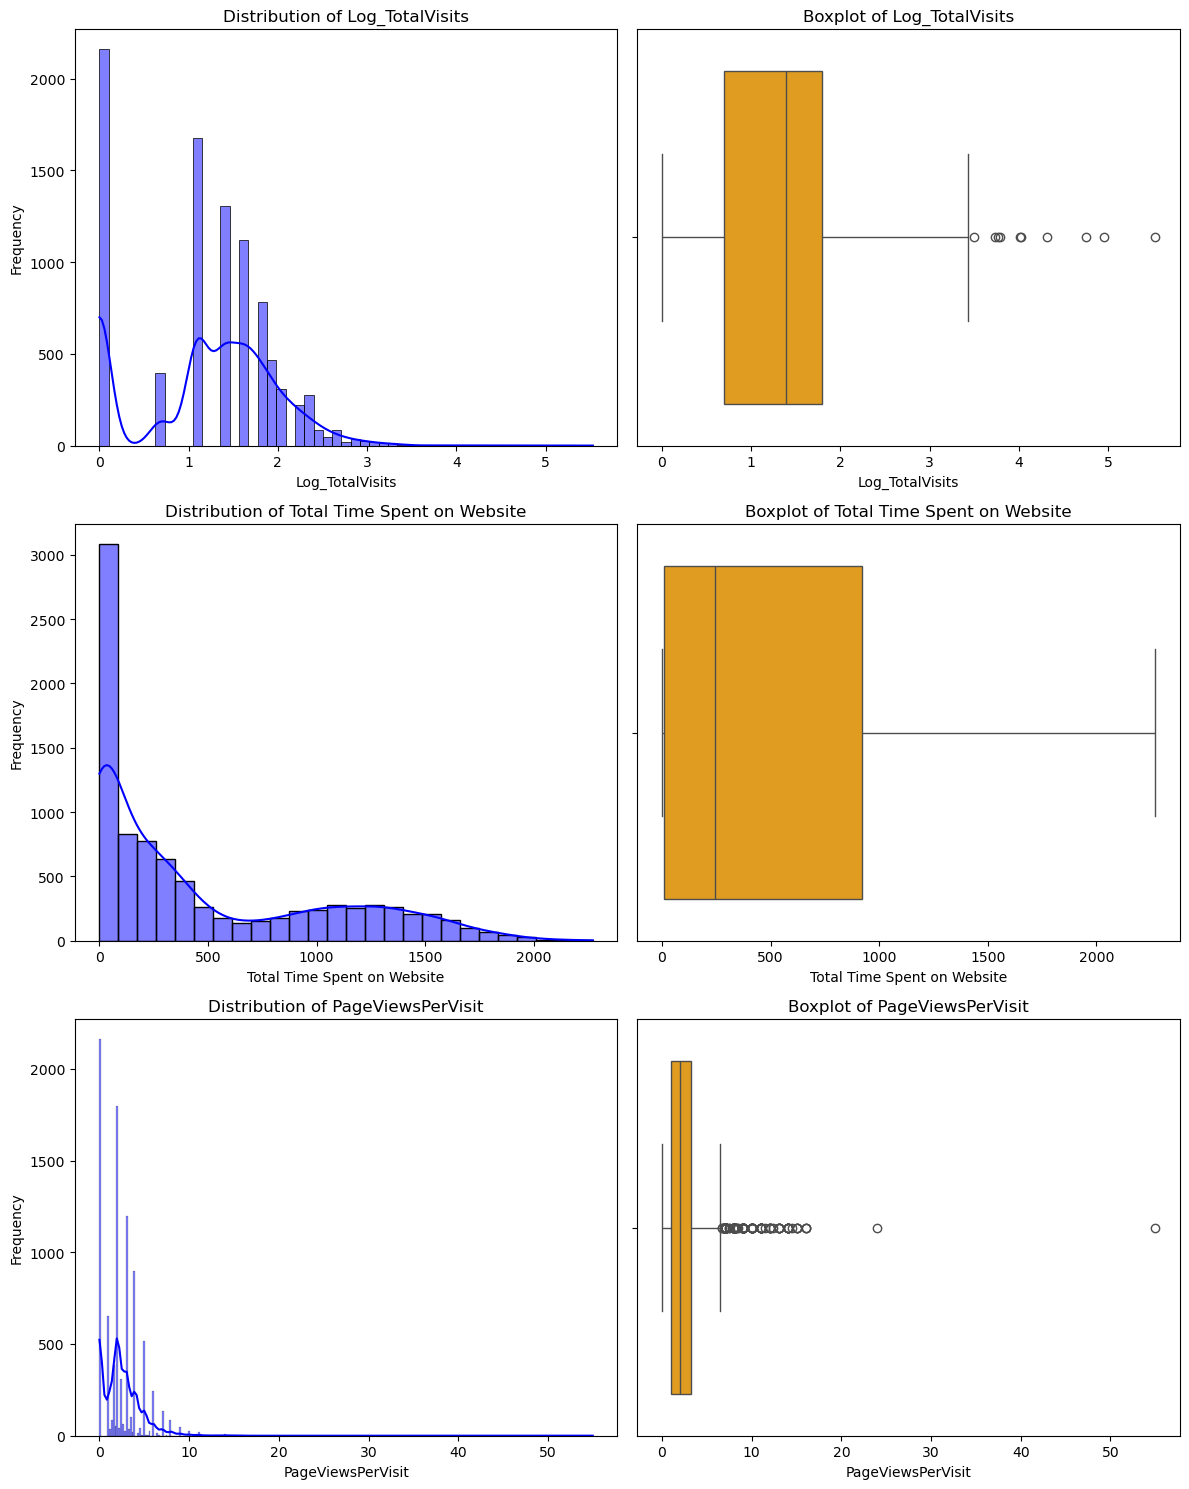

Skewness of numerical columns:
Log_TotalVisits               -0.153676
Total Time Spent on Website    0.970703
PageViewsPerVisit              2.877019
dtype: float64


In [58]:
# List of numerical columns to analyze
numerical_columns = ['Log_TotalVisits', 'Total Time Spent on Website', 'PageViewsPerVisit']

# Set up the plotting grid
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 5 * len(numerical_columns)))

for i, column in enumerate(numerical_columns):
    # Distribution Plot (Histogram + KDE)
    sns.histplot(df[column], kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'Distribution of {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Boxplot to identify outliers
    sns.boxplot(x=df[column], ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f'Boxplot of {column}')
    axes[i, 1].set_xlabel(column)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Calculate skewness for numerical columns
skewness = df[numerical_columns].skew()
print("Skewness of numerical columns:")
print(skewness)

- **Log_TotalVisits:** Has a skewness of 0.61, indicating a moderate positive skew. This means the distribution of Log_TotalVisits is slightly skewed to the right. There might be a few visitors with unusually high numbers of total visits compared to the majority.

- **Total Time Spent on Website:** Shows a skewness of 0.95, suggesting a more pronounced positive skew. This distribution is also skewed to the right, but with a longer tail. There are likely some visitors who spend a significantly longer time on the website than the average visitor.

- **Page Views Per Visit:** Has the highest skewness value of 1.25, indicating a substantial positive skew. This distribution has the longest tail to the right. It means that there are a few visitors who view a lot more pages per visit than the average.

- **Website Engagement:** The positive skewness of 'Total Time Spent on Website' and 'Page Views Per Visit' suggest that while most visitors have moderate engagement, there is a segment of visitors who exhibit high levels of engagement (spending a lot of time and viewing many pages).

- **Potential Leads:** These highly engaged visitors might represent potential "hot leads" as they show greater interest in the online courses. The company could potentially focus more on converting these highly engaged visitors.

- **Marketing Strategies:** The insights into 'Log_TotalVisits' could help evaluate the effectiveness of marketing strategies to attract more visitors.

- **Content Optimization:** The distribution of 'Page Views Per Visit' might indicate which web pages are most popular or hold visitor attention longer. This can guide content optimization efforts.

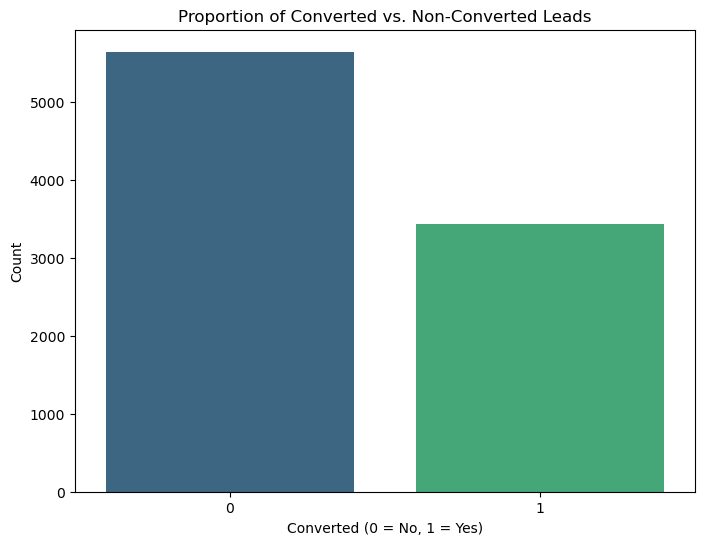

Breakdown of Conversion Rates:
Converted
0    5639
1    3435
Name: count, dtype: int64

Proportion of Conversion Rates (%):
Converted
0    62.144589
1    37.855411
Name: proportion, dtype: float64


In [61]:
# Bar Plot for Categorical Variable (Converted)
plt.figure(figsize=(8, 6))
sns.countplot(x='Converted', data=df, palette='viridis')
plt.title('Proportion of Converted vs. Non-Converted Leads')
plt.xlabel('Converted (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Value Counts for Converted Column
conversion_counts = df['Converted'].value_counts()
conversion_proportion = df['Converted'].value_counts(normalize=True) * 100

print("Breakdown of Conversion Rates:")
print(conversion_counts)
print("\nProportion of Conversion Rates (%):")
print(conversion_proportion)

Approximately 37.85% of leads converted, while 62.14% did not

- **Imbalance:** The results show that the dataset has an imbalance in the target variable (Converted). There are more leads who did not convert (0) compared to those who converted (1). This imbalance is important to consider when building a machine learning model as it might affect the model's performance.

- **Conversion Rate:** The conversion rate is approximately 37.5%. This means that about 37.5% of the leads generated actually converted into paying customers. This is lower than the CEO's target of 80%.

- **Focus on Improvement:** The company's current lead conversion process needs improvement to reach the desired conversion rate. The task is to identify and target potential "hot leads" more effectively.

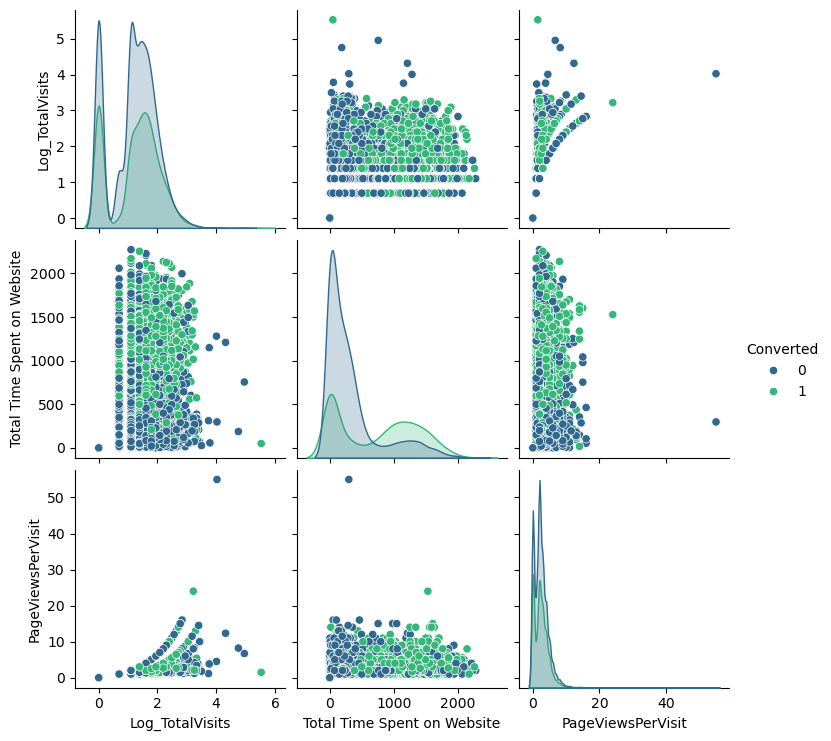

In [64]:
sns.pairplot(df, vars=numerical_columns, hue='Converted', palette='viridis', diag_kind='kde', height=2.5)

# Show the plot
plt.show()


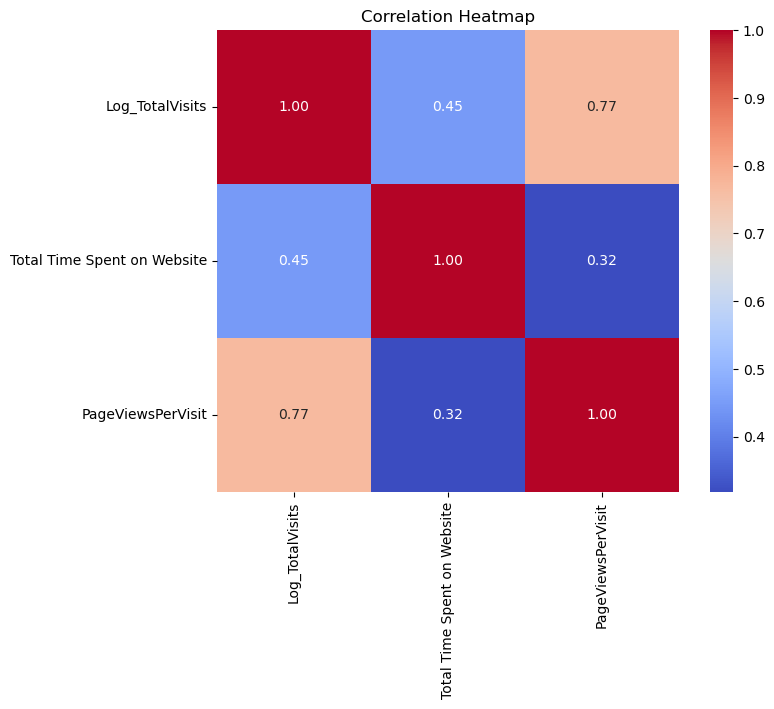

In [65]:
# Heatmap for correlation between numerical columns
plt.figure(figsize=(8, 6))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

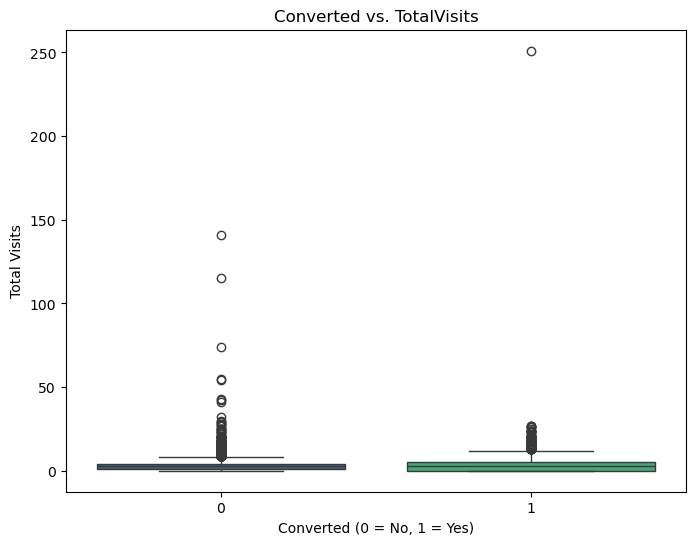

In [66]:
# Boxplot: Converted vs. TotalVisits
plt.figure(figsize=(8, 6))
sns.boxplot(x='Converted', y='TotalVisits', data=df, palette='viridis')
plt.title('Converted vs. TotalVisits')
plt.xlabel('Converted (0 = No, 1 = Yes)')
plt.ylabel('Total Visits')
plt.show()



In [67]:
# Correlation Coefficient: Total Time Spent on Website and Converted
corr_coeff, corr_p_value = pearsonr(df['Total Time Spent on Website'], df['Converted'])
print(f"Correlation Coefficient between Total Time Spent on Website and Converted: {corr_coeff}, P-value: {corr_p_value}")

Correlation Coefficient between Total Time Spent on Website and Converted: 0.3592613257962254, P-value: 1.362410411204806e-274


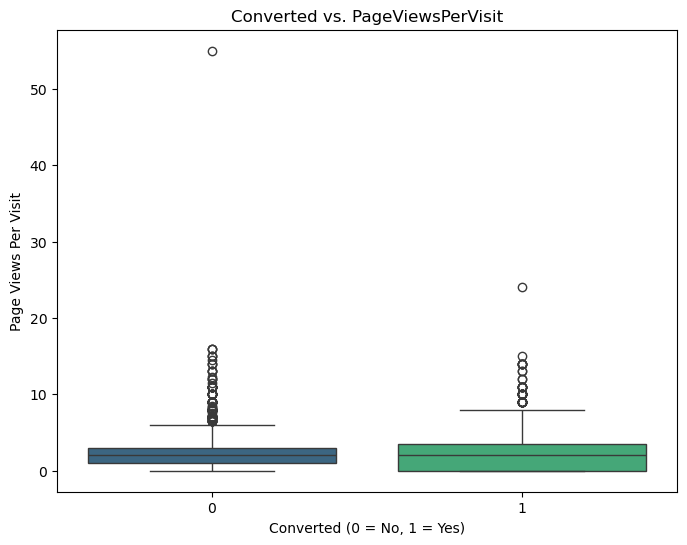

In [68]:
# Boxplot: Converted vs. PageViewsPerVisit
plt.figure(figsize=(8, 6))
sns.boxplot(x='Converted', y='PageViewsPerVisit', data=df, palette='viridis')
plt.title('Converted vs. PageViewsPerVisit')
plt.xlabel('Converted (0 = No, 1 = Yes)')
plt.ylabel('Page Views Per Visit')
plt.show()


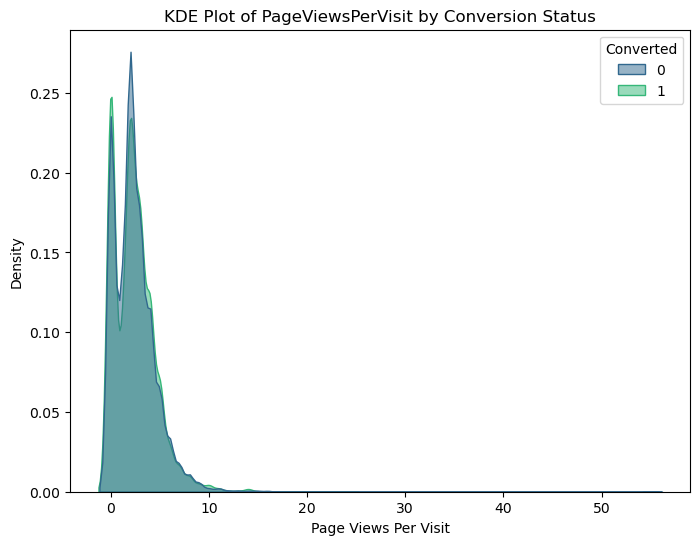

In [69]:
# KDE Plot: Converted vs. PageViewsPerVisit
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='PageViewsPerVisit', hue='Converted', fill=True, common_norm=False, palette='viridis', alpha=0.5)
plt.title('KDE Plot of PageViewsPerVisit by Conversion Status')
plt.xlabel('Page Views Per Visit')
plt.ylabel('Density')
plt.show()

In [70]:
temp = df.loc[:, df.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'LeadSource', 'Do Not Email', 'Do Not Call',
       'LastActivity', 'Specialization', 'occupation', 'City',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

We will create the dummies for the categorical variables

In [72]:
dummy = pd.get_dummies(df[['Lead Origin', 'LeadSource', 'Do Not Email', 'Do Not Call',
       'LastActivity', 'Specialization', 'occupation', 'City',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True, dtype= 'int' )

df = pd.concat([df, dummy], axis=1)

In [73]:
# We have our dummy variable created. We will drop the main variables now
df = df.drop(['Lead Origin', 'LeadSource', 'Do Not Email', 'Do Not Call',
       'LastActivity', 'Specialization', 'occupation', 'City',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity','TotalVisits'], axis = 1)

In [74]:
df.head()

,Converted,Total Time Spent on Website,PageViewsPerVisit,Log_TotalVisits,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,674,2.5,1.791759,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1532,2.0,1.098612,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,305,1.0,0.693147,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,1428,1.0,1.098612,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


### Model Building

In [76]:
df.columns

Index(['Converted', 'Total Time Spent on Website', 'PageViewsPerVisit',
       'Log_TotalVisits', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'LeadSource_Direct Traffic', 'LeadSource_Facebook', 'LeadSource_Google',
       'LeadSource_Live Chat', 'LeadSource_NC_EDM', 'LeadSource_Olark Chat',
       'LeadSource_Organic Search', 'LeadSource_Pay per Click Ads',
       'LeadSource_Press_Release', 'LeadSource_Reference',
       'LeadSource_Referral Sites', 'LeadSource_Social Media',
       'LeadSource_WeLearn', 'LeadSource_Welingak Website', 'LeadSource_bing',
       'LeadSource_blog', 'LeadSource_google', 'LeadSource_testone',
       'LeadSource_welearnblog_Home', 'LeadSource_youtubechannel',
       'Do Not Email_Yes', 'Do Not Call_Yes', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Email Link Clicked',
       'LastActivity_Email Marked Spam', 'LastActivity_Email Opened',
       'LastActi

In [77]:
# Put all the feature variables in X
X = df.drop('Converted', axis=1)

# Put target variable in y
y = df['Converted']

In [78]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [79]:
# Scaling the model
scaler = MinMaxScaler()
# TotalVisits, Total Time Spent on Website, Page Views Per Visit
X_train[['Log_TotalVisits', 'Total Time Spent on Website', 'PageViewsPerVisit']] = scaler.fit_transform(X_train[['Log_TotalVisits', 'Total Time Spent on Website', 'PageViewsPerVisit']])

X_train.head()

,Total Time Spent on Website,PageViewsPerVisit,Log_TotalVisits,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0.178347,0.083333,0.198685,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0.085355,0.083333,0.198685,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0.619946,0.083333,0.198685,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.711590,0.104167,0.324041,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [80]:
df.corr() #Checking the correlation

,Converted,Total Time Spent on Website,PageViewsPerVisit,Log_TotalVisits,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.359261,0.000260,0.023662,-0.037481,0.300775,-0.009328,-0.073186,-0.010651,0.029960,...,-0.008194,0.044577,-0.263532,-0.071564,-0.033830,0.013451,0.360233,0.037893,-0.016286,-0.008194
Total Time Spent on Website,0.359261,1.000000,0.318350,0.446504,0.292571,-0.188526,-0.050742,0.140793,-0.050248,0.215390,...,-0.003772,0.022925,-0.127020,-0.050877,0.028713,-0.009298,0.137169,0.009594,0.003951,-0.007584
PageViewsPerVisit,0.000260,0.318350,1.000000,0.766474,0.484119,-0.268415,-0.056068,0.133118,-0.053735,0.204870,...,-0.001798,0.013928,-0.096466,-0.088593,0.026102,-0.011516,0.059445,0.019415,0.021668,0.001457
Log_TotalVisits,0.023662,0.446504,0.766474,1.000000,0.558338,-0.356413,-0.080934,0.217198,-0.078628,0.308163,...,-0.001217,0.028609,-0.149581,-0.087667,0.182327,-0.015720,0.028807,0.014512,0.016381,0.013285
Lead Origin_Landing Page Submission,-0.037481,0.292571,0.484119,0.558338,1.000000,-0.282445,-0.062195,0.523695,-0.059438,0.078455,...,0.009722,0.002608,-0.084643,-0.118758,0.043041,-0.011337,0.052736,-0.000847,0.018171,-0.011337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Resubscribed to emails,0.013451,-0.009298,-0.011516,-0.015720,-0.011337,-0.002746,-0.000605,-0.006551,-0.000615,-0.007137,...,-0.000110,-0.000413,-0.007875,-0.001506,-0.002001,1.000000,-0.005854,-0.000625,-0.000741,-0.000110
Last Notable Activity_SMS Sent,0.360233,0.137169,0.059445,0.028807,0.052736,0.115585,-0.027600,0.016095,-0.023765,-0.001771,...,-0.005854,-0.021918,-0.418219,-0.079994,-0.106259,-0.005854,1.000000,-0.033170,-0.039363,-0.005854
Last Notable Activity_Unreachable,0.037893,0.009594,0.019415,0.014512,-0.000847,0.007222,-0.003426,-0.016425,-0.003483,0.011539,...,-0.000625,-0.002339,-0.044621,-0.008535,-0.011337,-0.000625,-0.033170,1.000000,-0.004200,-0.000625
Last Notable Activity_Unsubscribed,-0.016286,0.003951,0.021668,0.016381,0.018171,-0.018465,-0.004066,0.004851,-0.004133,-0.000753,...,-0.000741,-0.002775,-0.052952,-0.010128,-0.013454,-0.000741,-0.039363,-0.004200,1.000000,-0.000741


We will now build the logistic regression model

In [82]:
reg = LogisticRegression() 

In [83]:
rfe = RFE(estimator=reg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [84]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('PageViewsPerVisit', False, 4),
 ('Log_TotalVisits', True, 1),
 ('Lead Origin_Landing Page Submission', False, 33),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('LeadSource_Direct Traffic', False, 10),
 ('LeadSource_Facebook', False, 44),
 ('LeadSource_Google', False, 13),
 ('LeadSource_Live Chat', False, 43),
 ('LeadSource_NC_EDM', False, 31),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 12),
 ('LeadSource_Pay per Click Ads', False, 41),
 ('LeadSource_Press_Release', False, 40),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', False, 11),
 ('LeadSource_Social Media', False, 16),
 ('LeadSource_WeLearn', False, 56),
 ('LeadSource_Welingak Website', True, 1),
 ('LeadSource_bing', False, 54),
 ('LeadSource_blog', False, 27),
 ('LeadSource_google', False, 9),
 ('LeadSource_testone', False, 39),
 ('LeadSource_welearnblog_Home', False, 34),
 ('LeadSource_youtubech

In [85]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Log_TotalVisits',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'LeadSource_Olark Chat', 'LeadSource_Reference',
       'LeadSource_Welingak Website', 'Do Not Email_Yes',
       'LastActivity_Olark Chat Conversation',
       'occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [86]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [87]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.0
Date:                Mon, 16 Dec 2024   Deviance:                       5482.0
Time:                        22:57:09   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3749
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2429      0.141     -8.841      0.000      -1.518      -0.967
Total Time Spent on Website                       4.6257      0.163     28.429      0.000       4.307       4.945
Log_TotalVisits                                   1.6815      0.409      4.108      0.000       0.879       2.484
Lead Origin_Lead Add Form                         2.5063      0.953      2.631      0.009       0.639       4.373
Lead Origin_Lead Import                           2.0711      0.455      4.549      0.000       1.179       2.964
LeadSource_Olark Chat                             1.6422      0.148     11.071      0.000       1.352       1.933
LeadSource_Reference                              2.1339      0.972      2.196      0.028       0.229       4.039
LeadSource_Welingak Website                       4.0087      1.195      3.354      0.001       1.666       6.351
Do Not Email_Yes                                 -1.8478      0.172    -10.752      0.000      -2.185      -1.511
LastActivity_Olark Chat Conversation             -1.2326      0.187     -6.603      0.000      -1.599      -0.867
occupation_Working Professional                   1.1905      0.110     10.812      0.000       0.975       1.406
Last Notable Activity_Email Link Clicked         -1.9235      0.250     -7.684      0.000      -2.414      -1.433
Last Notable Activity_Email Opened               -1.4342      0.086    -16.592      0.000      -1.604      -1.265
Last Notable Activity_Modified                   -1.9065      0.095    -20.119      0.000      -2.092      -1.721
Last Notable Activity_Olark Chat Conversation    -1.7425      0.372     -4.679      0.000      -2.472      -1.013
Last Notable Activity_Page Visited on Website    -1.9024      0.203     -9.367      0.000      -2.300      -1.504
=================================================================================================================
"""

In [88]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.43
5,LeadSource_Reference,48.02
6,LeadSource_Welingak Website,15.45
1,Log_TotalVisits,3.96
12,Last Notable Activity_Modified,2.23
0,Total Time Spent on Website,2.21
11,Last Notable Activity_Email Opened,1.97
8,LastActivity_Olark Chat Conversation,1.90
4,LeadSource_Olark Chat,1.73
13,Last Notable Activity_Olark Chat Conversation,1.35


In [89]:
# Let's first drop the variable `LeadSource_Reference` since it has a high p-value as well as a high VIF.
X_train.drop('LeadSource_Reference', axis=1, inplace=True)

In [90]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()

In [91]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2742.9
Date:                Mon, 16 Dec 2024   Deviance:                       5485.9
Time:                        22:57:10   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3745
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2404      0.141     -8.818      0.000      -1.516      -0.965
Total Time Spent on Website                       4.6229      0.163     28.413      0.000       4.304       4.942
Log_TotalVisits                                   1.6732      0.410      4.086      0.000       0.871       2.476
Lead Origin_Lead Add Form                         4.5655      0.246     18.526      0.000       4.082       5.048
Lead Origin_Lead Import                           2.0677      0.455      4.541      0.000       1.175       2.960
LeadSource_Olark Chat                             1.6377      0.148     11.031      0.000       1.347       1.929
LeadSource_Welingak Website                       1.9453      0.758      2.567      0.010       0.460       3.431
Do Not Email_Yes                                 -1.8439      0.172    -10.747      0.000      -2.180      -1.508
LastActivity_Olark Chat Conversation             -1.2318      0.187     -6.600      0.000      -1.598      -0.866
occupation_Working Professional                   1.1934      0.110     10.850      0.000       0.978       1.409
Last Notable Activity_Email Link Clicked         -1.9190      0.250     -7.678      0.000      -2.409      -1.429
Last Notable Activity_Email Opened               -1.4333      0.086    -16.586      0.000      -1.603      -1.264
Last Notable Activity_Modified                   -1.9056      0.095    -20.119      0.000      -2.091      -1.720
Last Notable Activity_Olark Chat Conversation    -1.7409      0.372     -4.677      0.000      -2.470      -1.011
Last Notable Activity_Page Visited on Website    -1.9057      0.203     -9.367      0.000      -2.304      -1.507
=================================================================================================================
"""

In [92]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Log_TotalVisits,3.96
11,Last Notable Activity_Modified,2.23
0,Total Time Spent on Website,2.21
10,Last Notable Activity_Email Opened,1.97
7,LastActivity_Olark Chat Conversation,1.90
4,LeadSource_Olark Chat,1.73
2,Lead Origin_Lead Add Form,1.47
12,Last Notable Activity_Olark Chat Conversation,1.35
5,LeadSource_Welingak Website,1.32
13,Last Notable Activity_Page Visited on Website,1.20


In [93]:
# Let's drop the variable `LeadSource_Welingak Website`
X_train.drop('LeadSource_Welingak Website', axis=1, inplace=True)

In [94]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2748.2
Date:                Mon, 16 Dec 2024   Deviance:                       5496.4
Time:                        22:57:10   Pearson chi2:                 6.65e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3735
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2388      0.141     -8.812      0.000      -1.514      -0.963
Total Time Spent on Website                       4.6201      0.163     28.415      0.000       4.301       4.939
Log_TotalVisits                                   1.6700      0.409      4.081      0.000       0.868       2.472
Lead Origin_Lead Add Form                         4.8834      0.239     20.444      0.000       4.415       5.352
Lead Origin_Lead Import                           2.0669      0.455      4.541      0.000       1.175       2.959
LeadSource_Olark Chat                             1.6357      0.148     11.025      0.000       1.345       1.926
Do Not Email_Yes                                 -1.8210      0.170    -10.729      0.000      -2.154      -1.488
LastActivity_Olark Chat Conversation             -1.2326      0.187     -6.601      0.000      -1.599      -0.867
occupation_Working Professional                   1.1809      0.110     10.708      0.000       0.965       1.397
Last Notable Activity_Email Link Clicked         -1.9245      0.251     -7.680      0.000      -2.416      -1.433
Last Notable Activity_Email Opened               -1.4331      0.086    -16.591      0.000      -1.602      -1.264
Last Notable Activity_Modified                   -1.9044      0.095    -20.131      0.000      -2.090      -1.719
Last Notable Activity_Olark Chat Conversation    -1.7152      0.369     -4.653      0.000      -2.438      -0.993
Last Notable Activity_Page Visited on Website    -1.9008      0.203     -9.367      0.000      -2.299      -1.503
=================================================================================================================
"""

In [95]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Log_TotalVisits,3.96
10,Last Notable Activity_Modified,2.23
0,Total Time Spent on Website,2.21
9,Last Notable Activity_Email Opened,1.97
6,LastActivity_Olark Chat Conversation,1.90
4,LeadSource_Olark Chat,1.73
11,Last Notable Activity_Olark Chat Conversation,1.35
12,Last Notable Activity_Page Visited on Website,1.20
7,occupation_Working Professional,1.15
2,Lead Origin_Lead Add Form,1.13


In [96]:
# Let's drop the variable `LastActivity_Olark Chat Conversation as this variable might increase the correlation
X_train.drop('LastActivity_Olark Chat Conversation', axis=1, inplace=True)

In [97]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2773.9
Date:                Mon, 16 Dec 2024   Deviance:                       5547.7
Time:                        22:57:10   Pearson chi2:                 6.69e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3684
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2086      0.140     -8.608      0.000      -1.484      -0.933
Total Time Spent on Website                       4.6537      0.163     28.533      0.000       4.334       4.973
Log_TotalVisits                                   1.6325      0.410      3.986      0.000       0.830       2.435
Lead Origin_Lead Add Form                         4.9313      0.239     20.604      0.000       4.462       5.400
Lead Origin_Lead Import                           2.0818      0.458      4.545      0.000       1.184       2.980
LeadSource_Olark Chat                             1.4360      0.145      9.913      0.000       1.152       1.720
Do Not Email_Yes                                 -1.7703      0.172    -10.314      0.000      -2.107      -1.434
occupation_Working Professional                   1.1637      0.109     10.657      0.000       0.950       1.378
Last Notable Activity_Email Link Clicked         -1.8928      0.253     -7.496      0.000      -2.388      -1.398
Last Notable Activity_Email Opened               -1.4266      0.087    -16.473      0.000      -1.596      -1.257
Last Notable Activity_Modified                   -2.1351      0.091    -23.577      0.000      -2.313      -1.958
Last Notable Activity_Olark Chat Conversation    -2.8612      0.326     -8.785      0.000      -3.500      -2.223
Last Notable Activity_Page Visited on Website    -1.9086      0.203     -9.401      0.000      -2.307      -1.511
=================================================================================================================
"""

In [98]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Log_TotalVisits,3.96
0,Total Time Spent on Website,2.20
8,Last Notable Activity_Email Opened,1.96
9,Last Notable Activity_Modified,1.96
4,LeadSource_Olark Chat,1.54
11,Last Notable Activity_Page Visited on Website,1.20
6,occupation_Working Professional,1.15
2,Lead Origin_Lead Add Form,1.13
5,Do Not Email_Yes,1.12
10,Last Notable Activity_Olark Chat Conversation,1.10


In [99]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.185302
1012    0.250932
9226    0.129251
4750    0.880886
7987    0.621737
1281    0.789810
2880    0.098189
4971    0.930039
7536    0.883816
1248    0.527572
dtype: float64

In [100]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18530172, 0.25093176, 0.12925145, 0.88088649, 0.62173685,
       0.78981002, 0.09818891, 0.93003946, 0.88381647, 0.52757228])

In [101]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.185302
1,0,0.250932
2,0,0.129251
3,1,0.880886
4,1,0.621737


In [102]:
# Create a new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's take a look at the dataframe
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.185302,0
1,0,0.250932,0
2,0,0.129251,0
3,1,0.880886,1
4,1,0.621737,1


In [103]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
print(confusion)

[[3435  470]
 [ 776 1670]]


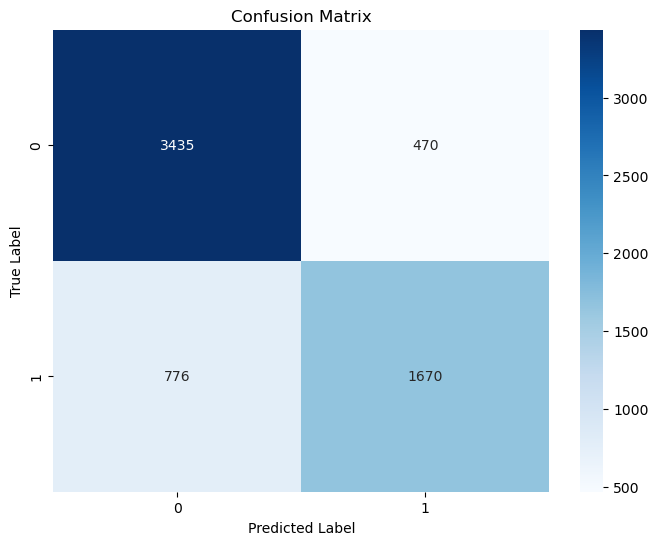

In [104]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [105]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8038104235553456


In [106]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
# Calculate the sensitivity

TP/(TP+FN)

0.6827473426001636

The model has a true positive rate (sensitivity) of 68.5%, which means it correctly identifies 68.5% of actual conversions.

In [109]:
# Calculate the specificity

TN/(TN+FP)

0.8796414852752881

The model accurately identifies 88.0% of non-conversions (true negatives). This is strong, indicating that the model is good in excluding leads who are unlikely to convert.



In [111]:
# ROC function

def draw_roc(actual, probs):
    # Compute false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)

    # Compute the Area Under the Curve (AUC) score
    auc_score = metrics.roc_auc_score(actual, probs)

    # Plot ROC curve
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [112]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

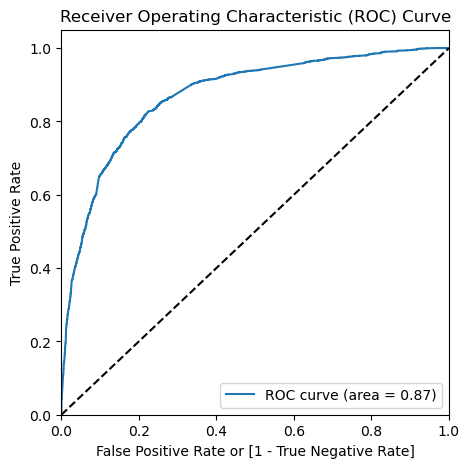

In [113]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [114]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.185302,0,1,1,0,0,0,0,0,0,0,0
1,0,0.250932,0,1,1,1,0,0,0,0,0,0,0
2,0,0.129251,0,1,1,0,0,0,0,0,0,0,0
3,1,0.880886,1,1,1,1,1,1,1,1,1,1,0
4,1,0.621737,1,1,1,1,1,1,1,1,0,0,0


In [115]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.548418  0.973835  0.281946
0.2   0.2  0.742718  0.910466  0.637644
0.3   0.3  0.786175  0.843009  0.750576
0.4   0.4  0.803496  0.766558  0.826633
0.5   0.5  0.803810  0.682747  0.879641
0.6   0.6  0.787435  0.573181  0.921639
0.7   0.7  0.768225  0.485282  0.945455
0.8   0.8  0.747599  0.399428  0.965685
0.9   0.9  0.701464  0.245707  0.986940


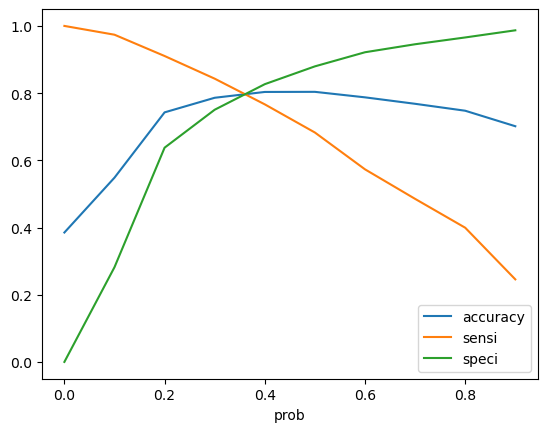

In [116]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.4, we get the optimal values of the three metrics. So let's choose 0.4 as our cutoff now.

In [118]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.185302,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.250932,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.129251,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.880886,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.621737,1,1,1,1,1,1,1,1,0,0,0,1


In [119]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8034955125177138

In [120]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion2

array([[3435,  470],
       [ 776, 1670]], dtype=int64)

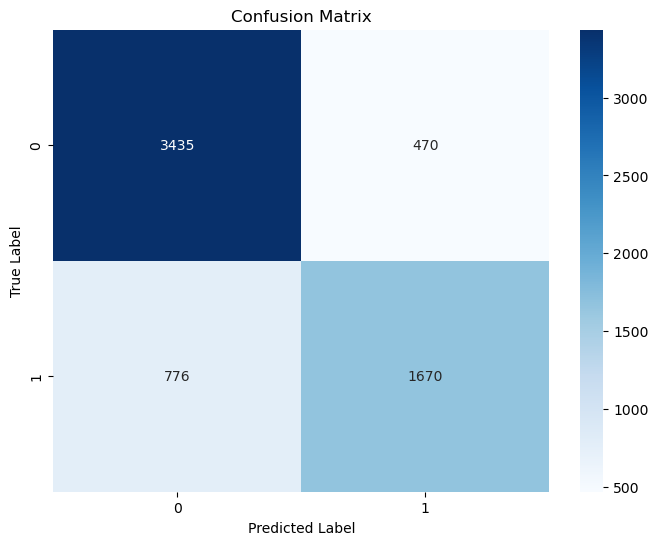

In [121]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion2, annot=True, fmt='d', cmap='Blues',)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [122]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
# Calculate Sensitivity

TP/(TP+FN)

0.6827473426001636

In [124]:
# Calculate Specificity

TN/(TN+FP)

0.8796414852752881

In [125]:
# Scale the test set as well using just 'transform'

X_test[['Log_TotalVisits', 'Total Time Spent on Website', 'PageViewsPerVisit']] = scaler.transform(X_test[['Log_TotalVisits', 'Total Time Spent on Website', 'PageViewsPerVisit']])

In [126]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Log_TotalVisits,Lead Origin_Lead Add Form,Lead Origin_Lead Import,LeadSource_Olark Chat,LeadSource_Reference,LeadSource_Welingak Website,Do Not Email_Yes,LastActivity_Olark Chat Conversation,occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0.070530,0.291068,0,0,0,0,0,0,0,0,0,1,0,0,0
1490,0.679695,0.324041,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,0.033243,0.198685,0,0,0,0,0,0,0,1,0,1,0,0,0
4216,0.000000,0.000000,1,0,0,1,0,0,0,0,0,0,1,0,0
3830,0.073675,0.397369,0,0,0,0,0,0,0,1,0,1,0,0,0


In [127]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [128]:
# Check X_test_sm

X_test_sm

,const,Total Time Spent on Website,Log_TotalVisits,Lead Origin_Lead Add Form,Lead Origin_Lead Import,LeadSource_Olark Chat,LeadSource_Reference,LeadSource_Welingak Website,Do Not Email_Yes,LastActivity_Olark Chat Conversation,occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,1.0,0.070530,0.291068,0,0,0,0,0,0,0,0,0,1,0,0,0
1490,1.0,0.679695,0.324041,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,1.0,0.033243,0.198685,0,0,0,0,0,0,0,1,0,1,0,0,0
4216,1.0,0.000000,0.000000,1,0,0,1,0,0,0,0,0,0,1,0,0
3830,1.0,0.073675,0.397369,0,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.372417,0.250712,0,0,0,0,0,0,0,1,0,0,1,0,0
2879,1.0,0.264600,0.198685,0,0,0,0,0,0,0,0,0,0,1,0,0
6501,1.0,0.599730,0.397369,0,0,0,0,0,0,0,0,0,0,0,0,0
7155,1.0,0.231357,0.250712,0,0,0,0,0,0,0,0,0,0,1,0,0


In [129]:
# Drop the required columns from X_test as well

X_test.drop(['LeadSource_Reference', 'LeadSource_Welingak Website', 'LastActivity_Olark Chat Conversation'], axis = 1, inplace = True)

In [130]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [131]:
y_test_pred[:10]

3271    0.138028
1490    0.902086
7936    0.270434
4216    0.830296
3830    0.382272
1800    0.323422
6507    0.370615
4821    0.292141
4223    0.976404
4714    0.129251
dtype: float64

In [132]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [133]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [134]:
# Remove index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [135]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [136]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.138028
1,1,0.902086
2,0,0.270434
3,1,0.830296
4,0,0.382272


In [137]:
# Rename the column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [138]:
# Make predictions on the test set using 0.40  as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.40 else 0)

In [139]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.138028,0
1,1,0.902086,1
2,0,0.270434,0
3,1,0.830296,1
4,0,0.382272,0


In [140]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)
print(f"Accuracy: {accuracy}")

Accuracy: 0.795813441057657


In [141]:
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[1421,  313],
       [ 243,  746]], dtype=int64)

In [142]:

TP = confusion3[1,1] # true positive
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [143]:
  # Calculate sensitivity
TP / float(TP+FN)

0.7542972699696663

In [144]:
# Calculate specificity
TN / float(TN+FP)

0.8194925028835064

In [145]:
#Precision

confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.704438149197356

In [146]:
#Recall

confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.7542972699696663

In [147]:
from sklearn.metrics import precision_recall_curve

In [148]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    1
 6347    0
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [149]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


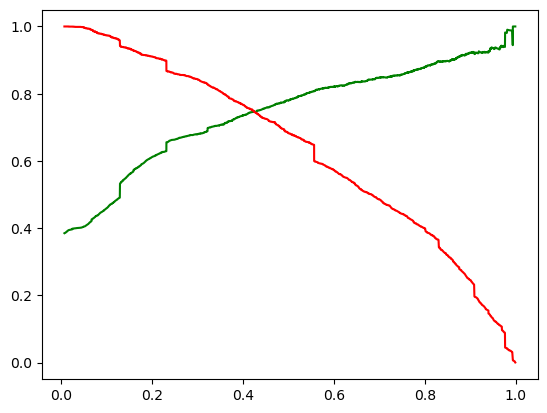

In [150]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [151]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.40 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.185302,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.250932,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.129251,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.880886,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.621737,1,1,1,1,1,1,1,1,0,0,0,1


In [152]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8034955125177138

In [153]:
# Let's create the confusion matrix once again

confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[3228,  677],
       [ 571, 1875]], dtype=int64)

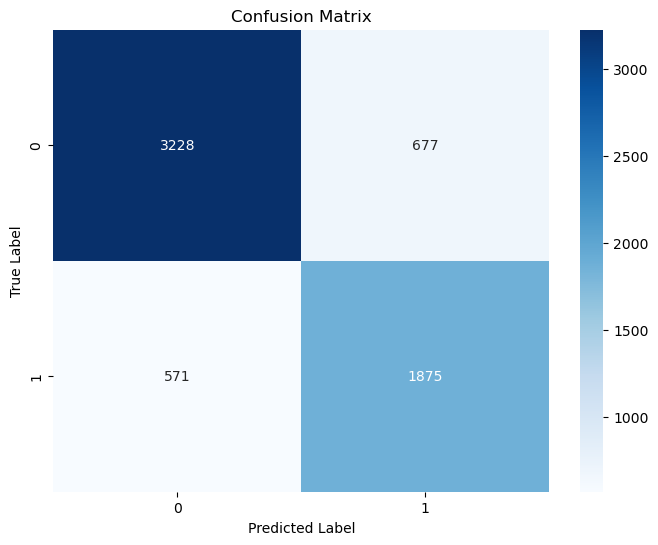

In [154]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion3, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [155]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [156]:
# Calculate Precision

TP/(TP+FP)

0.780373831775701

In [157]:
# Calculate Recall

TP/(TP+FN)

0.6827473426001636

The model obtains a total accuracy of 80.34%. It accurately detects 68.52% of genuine conversions (sensitivity) and 88.04% of actual non-conversions (specificity). While it is effective at detecting non-conversions, it misses a large number of real conversions. The precision of 73.17% and F1 score of 70.78% show a reasonable trade-off between properly targeting conversions and avoiding false positives.
